# Team 13: Wild Life Classification with Deep Learning Methods

The effectiveness of wildlife preservation relies heavily on in-depth understanding of the diversity and behavior of animals, which requires intensive manual labor of experts to correctly label the images collected. In this project, we will try to automate this process by constructing a deep learning model for wildlife classification.  

## Environment Setup 

In [1]:
# Import Packages 
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import sampler
import torchvision.datasets as dset
import torchvision.transforms as T
import torchvision.models as models
import numpy as np
import torch.nn.functional as F  
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
from torchvision import datasets, transforms, models 
from torch.utils.data import random_split
import torchvision
import matplotlib.pyplot as plt
import gc

## Load Dataset 

In [2]:
USE_GPU = True
dtype = torch.float32 

if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

print('using device:', device)

batch_size = 64
dataroot = "C:/Users/HinanawiTS/Documents/GitHub/ECE228-project/processed/processed" # Replace it to be your data directory! 
dataset = ImageFolder(root = dataroot, transform = transforms.Compose([transforms.ToTensor()]))
train_ratio = 0.7
trainlen = int(len(dataset) * train_ratio)
vallen = len(dataset) - trainlen
train, val = random_split(dataset, [trainlen, vallen])
loader_train = DataLoader(train, batch_size = batch_size, num_workers = 0, pin_memory = True)
loader_val = DataLoader(val, batch_size = batch_size, num_workers = 0, pin_memory = True)

using device: cuda


# Implement Training and Validation Pipeline 

In [3]:
# Data Transformation 
dataset = ImageFolder(root = dataroot,
                           transform = transforms.Compose([
                               transforms.Resize(224),
                               transforms.CenterCrop(224),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                           ]))
dataloader = DataLoader(dataset, batch_size = batch_size, num_workers = 0)
train_ratio = 0.7

trainlen = int(len(dataset) * train_ratio)
vallen = len(dataset) - trainlen
loader_train, loader_val = random_split(dataset, [trainlen, vallen])
loader_train = DataLoader(loader_train, batch_size = batch_size, num_workers = 0)
loader_val = DataLoader(loader_val, batch_size = batch_size, num_workers = 0)

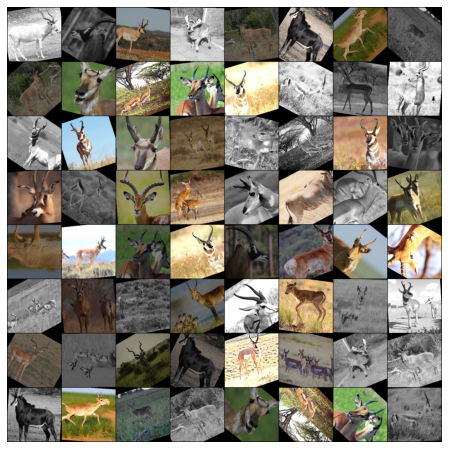

In [5]:
# Visualize Dataset 
real_batch = next(iter(dataloader))
plt.figure(figsize = (8, 8))

plt.axis("off")

plt.imshow(np.transpose(torchvision.utils.make_grid(real_batch[0].to(device), padding = 2, normalize = True).cpu(),(1,2,0)))

In [11]:
# Training Pipeline 
def train_model(model, optimizer, epochs):
    """
    Train a model using the PyTorch Module API, adapted from previous works. 
    
    :param model: model to train 
    :type model: Pytorch Module 
    
    :param optimizer: optimizer for training 
    :type optimizer: Pytorch Optimizer 
    
    :param epochs: number of epochs 
    :type epochs: integer 
    
    :returns: training error, validation accuracy 
    :type returns: list, list 
    
    """
    assert True 
    
    model = model.to(device=device)  
    tr = []
    va = []
    for e in range(epochs):
        for t, (x, y) in enumerate(loader_train):
            model.train()  
            x = x.to(device = device, dtype = dtype)  
            y = y.to(device = device, dtype = torch.long)
            scores = model(x)
            loss = F.cross_entropy(scores, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            if t % 200 == 0:
                print("Epoch: " + str(e) + ", Training Error: " + str(loss.item()))
                cs = validation_accuracy(loader_val, model)
                print()
            tr.append(loss.item())
            va.append(cs)
    return tr, va


In [12]:
# Validation Pipeline 
def validation_accuracy(loader, model):
    """ 
    Validation accuracy, adapted from previous existing works. 
    
    :param loader: data loader 
    :type loader: Pytorch loader 
    
    :param model: model 
    :type model: Pytorch model 
    
    :returns: validation accuracy 
    :type returns: list 
    
    """  
    assert True 
    
    num_correct = 0
    num_samples = 0
    model.eval()  
    with torch.no_grad():
        for x, y in loader:
            x = x.to(device = device, dtype = dtype)  
            y = y.to(device = device, dtype = torch.long)
            scores = model(x)
            _, preds = scores.max(1)
            num_correct += (preds == y).sum()
            num_samples += preds.size(0)
        acc = float(num_correct) / num_samples
        print("Validation Accuracy: " + str(100 * acc) + "%")
        
    return acc


# Baseline Model Training 

In this section we train several deep learning models and choose the best one to be our baseline model. The models include: VGG 16, Resnet 50, and DenseNet 121. MLP is not included here because it was proven not powerful enough in our prior experiments. All models are trained for 10 epochs, using Cross-Entropy loss, Adam Optimizer, with batch size = 16, learning rate = 0.0001. 

In [13]:
vgmodel = models.vgg16(pretrained = True)
optimizer = optim.Adam(vgmodel.parameters(), lr = 0.0001)
tr, va = train_model(vgmodel, optimizer, epochs = 10)

Epoch: 0, Training Error: 13.26813793182373
Validation Accuracy: 0.7064868336544637%

Epoch: 1, Training Error: 3.7695999145507812
Validation Accuracy: 14.129736673089274%

Epoch: 2, Training Error: 1.8839693069458008
Validation Accuracy: 43.4810533076429%

Epoch: 3, Training Error: 0.8474977612495422
Validation Accuracy: 57.67501605651895%

Epoch: 4, Training Error: 0.45503944158554077
Validation Accuracy: 60.372511239563266%

Epoch: 5, Training Error: 0.28628653287887573
Validation Accuracy: 61.43224149004496%

Epoch: 6, Training Error: 0.14245788753032684
Validation Accuracy: 69.1072575465639%

Epoch: 7, Training Error: 0.036303892731666565
Validation Accuracy: 65.79961464354528%

Epoch: 8, Training Error: 0.07001402974128723
Validation Accuracy: 69.97430956968529%

Epoch: 9, Training Error: 0.04163140803575516
Validation Accuracy: 67.2447013487476%



In [17]:
# clear gpu cache 
del vgmodel
torch.cuda.empty_cache()

In [18]:
resnet50 = models.resnet50(pretrained = True)
optimizer = optim.Adam(resnet50.parameters(), lr = 0.0001)
tr_resnet50, va_resnet50 = train_model(resnet50, optimizer, epochs = 10)

Epoch: 0, Training Error: 10.684001922607422
Validation Accuracy: 0.802825947334618%

Epoch: 1, Training Error: 0.701712965965271
Validation Accuracy: 71.38728323699422%

Epoch: 2, Training Error: 0.09078599512577057
Validation Accuracy: 82.46628131021194%

Epoch: 3, Training Error: 0.015550782904028893
Validation Accuracy: 84.84264611432242%

Epoch: 4, Training Error: 0.007995977066457272
Validation Accuracy: 85.22800256904303%

Epoch: 5, Training Error: 0.0052944365888834
Validation Accuracy: 85.16377649325626%

Epoch: 6, Training Error: 0.004036248195916414
Validation Accuracy: 85.32434168272319%

Epoch: 7, Training Error: 0.003135609207674861
Validation Accuracy: 85.48490687219011%

Epoch: 8, Training Error: 0.002573712496086955
Validation Accuracy: 85.67758509955041%

Epoch: 9, Training Error: 0.002082881983369589
Validation Accuracy: 85.77392421323057%



In [20]:
# Number of learnable parameters in Resnet50 
sum([np.prod(p.size()) for p in filter(lambda p: p.requires_grad, resnet50.parameters())])

25557032

In [24]:
del resnet50 
gc.collect()
torch.cuda.empty_cache()

In [29]:
dense = models.densenet121(pretrained = True)
optimizer = optim.Adam(dense.parameters(), lr = 0.0001)
tr_dense, va_dense = train_model(dense, optimizer, epochs = 10)

Epoch: 0, Training Error: 10.464937210083008
Validation Accuracy: 0.7064868336544637%

Epoch: 1, Training Error: 1.6151349544525146
Validation Accuracy: 41.939627488760436%

Epoch: 2, Training Error: 0.38385775685310364
Validation Accuracy: 70.84136159280668%

Epoch: 3, Training Error: 0.09412388503551483
Validation Accuracy: 76.14001284521515%

Epoch: 4, Training Error: 0.04372430592775345
Validation Accuracy: 78.1631342324984%

Epoch: 5, Training Error: 0.02456083334982395
Validation Accuracy: 78.64482980089916%

Epoch: 6, Training Error: 0.016827141866087914
Validation Accuracy: 78.96596017983302%

Epoch: 7, Training Error: 0.012614920735359192
Validation Accuracy: 79.60822093770071%

Epoch: 8, Training Error: 0.009940392337739468
Validation Accuracy: 80.05780346820809%

Epoch: 9, Training Error: 0.008086886256933212
Validation Accuracy: 80.18625561978163%



In [32]:
del dense
torch.cuda.empty_cache()

# Regularization Improvement Analysis 

In this section, we compare the performance between different regularization terms to select a best combination of the regularization terms to improve the vanilla Resnet50 architecture. The regularization terms we tried: Dropout Only, BatchNorm Only, and Dropout BatchNorm Combined. 


In [85]:
class Resnet_dropout(nn.Module):
    def __init__(self):
        super(Resnet_dropout, self).__init__()
        self.model = models.resnet50(pretrained = True)
        self.model.fc = nn.Sequential(
            nn.Linear(2048, 256),
            nn.Dropout(0.2),
            nn.Linear(256, 88)
        )
        
    def forward(self, x): 
        batch_size, _, _,_ = x.shape
        x = self.model(x)
        return x

resnet_dropout = Resnet_dropout()
optimizer = optim.Adam(resnet_dropout.parameters(), lr = 0.0001)
tr_dropout, va_dropout = train_model(resnet_dropout, optimizer, epochs = 5)

Epoch: 0, Training Error: 4.461853981018066
Validation Accuracy: 3.4682080924855487%

Epoch: 1, Training Error: 1.0388938188552856
Validation Accuracy: 75.72254335260115%

Epoch: 2, Training Error: 0.215260848402977
Validation Accuracy: 85.83815028901735%

Epoch: 3, Training Error: 0.05251816287636757
Validation Accuracy: 88.88888888888889%

Epoch: 4, Training Error: 0.019342364743351936
Validation Accuracy: 90.3339755940912%



In [87]:
# clear gpu cache 
del resnet_dropout 
torch.cuda.empty_cache()

In [101]:
class Resnet_batchnorm(nn.Module):
    def __init__(self):
        super(Resnet_batchnorm, self).__init__()
        self.model = models.resnet50(pretrained = True)
        self.model.fc = nn.Sequential(
            nn.Linear(2048, 256),
            nn.BatchNorm1d(256),
            nn.Linear(256, 88)
        )
        
    def forward(self, x): 
        batch_size, _, _,_ = x.shape
        x = self.model(x)
        return x

resnet_batchnorm = Resnet_batchnorm()
optimizer = optim.Adam(resnet_batchnorm.parameters(), lr = 0.0001)
tr_batchnorm, va_batchnorm = train_model(resnet_batchnorm, optimizer, epochs = 5)

Epoch: 0, Training Error: 4.728841781616211
Validation Accuracy: 3.821451509312781%

Epoch: 1, Training Error: 0.5908837914466858
Validation Accuracy: 79.54399486191393%

Epoch: 2, Training Error: 0.09586597979068756
Validation Accuracy: 84.6499678869621%

Epoch: 3, Training Error: 0.029147889465093613
Validation Accuracy: 86.9942196531792%

Epoch: 4, Training Error: 0.00897564459592104
Validation Accuracy: 88.4393063583815%



In [102]:
# clear gpu cache 
del resnet_batchnorm
torch.cuda.empty_cache()

In [98]:
class Resnetplus(nn.Module):
    def __init__(self):
        super(Resnetplus, self).__init__()
        self.model = models.resnet50(pretrained = True)
        self.model.fc = nn.Sequential(
            nn.Linear(2048, 256),
            nn.BatchNorm1d(256),
            nn.Dropout(0.2),
            nn.Linear(256, 88)
        )
        
    def forward(self, x): 
        batch_size, _, _,_ = x.shape
        x = self.model(x)
        return x

In [100]:
resnetplus = Resnetplus()
optimizer = optim.Adam(resnetplus.parameters(), lr = 0.0001)
tr_improved, va_improved = train_model(resnetplus, optimizer, epochs = 5)

Epoch: 0, Training Error: 4.785253524780273
Validation Accuracy: 1.5093127809890816%

Epoch: 1, Training Error: 0.5602911710739136
Validation Accuracy: 83.55812459858703%

Epoch: 2, Training Error: 0.0967964380979538
Validation Accuracy: 90.01284521515736%

Epoch: 3, Training Error: 0.037931136786937714
Validation Accuracy: 91.32947976878613%

Epoch: 4, Training Error: 0.021875906735658646
Validation Accuracy: 91.93962748876044%



# Improvement Analysis Visualization 

In this section we visualize the training error curve and validation error curve to understand which regularization terms provides the most improvement over the original model. 

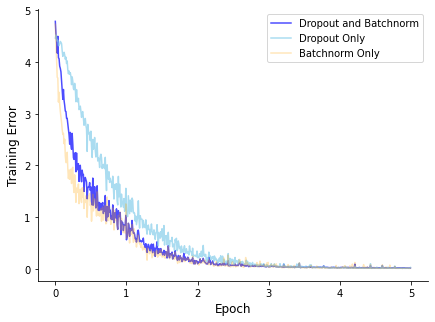

In [105]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

my_dict_dropout = dict(x = np.arange(0, 5, 5 / 570), y = tr_dropout, z = va_dropout)

v_dropout = pd.DataFrame(my_dict_dropout)

my_dict_batchnorm = dict(x = np.arange(0, 5, 5 / 570), y = tr_batchnorm, z = va_batchnorm)
v_batchnorm = pd.DataFrame(my_dict_batchnorm)

my_dict = dict(x = np.arange(0, 5, 5 / 570), y = tr_improved, z = va_improved)
vii = pd.DataFrame(my_dict)

plt.figure(figsize = (7, 5))
te = sns.lineplot(x = 'x', y = 'y', data = vii, label = "Dropout and Batchnorm", color = "blue", alpha = 0.7)
te = sns.lineplot(x = 'x', y = 'y', data = v_dropout, label = "Dropout Only", color = "skyblue", alpha = 0.7)
te = sns.lineplot(x = 'x', y = 'y', data = v_batchnorm, label = "Batchnorm Only", color = "orange", alpha = 0.27)

plt.xlabel("Epoch", fontsize = 12)
plt.ylabel("Training Error", fontsize = 12)

te.spines['top'].set_visible(False)
te.spines['right'].set_visible(False)

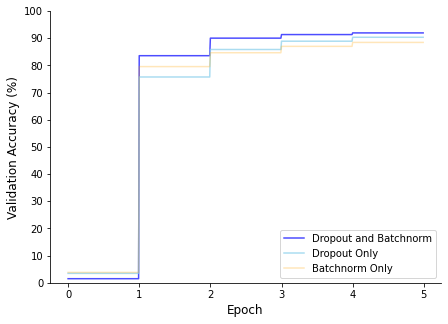

In [127]:
plt.figure(figsize = (7, 5))

vaplt = sns.lineplot(x = 'x', y = 'z', data = vii, label = "Dropout and Batchnorm", color = "blue", alpha = 0.7) 
vaplt = sns.lineplot(x = 'x', y = 'z', data = v_dropout, label = "Dropout Only", color = "skyblue", alpha = 0.7)
vaplt = sns.lineplot(x = 'x', y = 'z', data = v_batchnorm, label = "Batchnorm Only", color = "orange", alpha = 0.27)

plt.ylim(0, 1)
plt.yticks(np.arange(0, 1 + 0.01, 0.1), np.arange(0, 27 + 73 + 1, 10))

plt.xlabel("Epoch", fontsize = 12)
plt.ylabel("Validation Accuracy (%)", fontsize = 12)

vaplt.spines['top'].set_visible(False)
vaplt.spines['right'].set_visible(False)

# Resulting Improved Architecture 

Now we have chosen the best combination of regularization terms, we can add them to our model by replacing the fully connected layer with our custom Regularization Block, which is: Linear -> BatchNorm -> Dropout(20%) -> Linear -> Results. 

<div>
<img src="our_regulation.png" width="200"/>
</div>

We train our model using the same settings used by the other baseline models: Cross-Entropy loss and Adam Optimizer, with batch size = 64, Learning Rate = 0.0001, and trained for 10 epoch. 

In [79]:
class Resnetplus(nn.Module): 
    def __init__(self):
        super(Resnetplus, self).__init__()
        self.model = models.resnet50(pretrained = True)
        self.model.fc = nn.Sequential(
            nn.Linear(2048, 256),
            nn.BatchNorm1d(256),
            nn.Dropout(0.2),
            nn.Linear(256, 88)
        )
        
    def forward(self, x): 
        batch_size, _, _,_ = x.shape
        x = self.model(x)
        return x

In [80]:
resnetplus = Resnetplus()
optimizer = optim.Adam(resnetplus.parameters(), lr = 0.0001)
tr_improved, va_improved = train_model(resnetplus, optimizer, epochs = 10)

Epoch: 0, Training Error: 4.708504676818848
Validation Accuracy: 1.4450867052023122%

Epoch: 1, Training Error: 0.6123146414756775
Validation Accuracy: 83.65446371226717%

Epoch: 2, Training Error: 0.10303197801113129
Validation Accuracy: 89.82016698779705%

Epoch: 3, Training Error: 0.04465426132082939
Validation Accuracy: 91.23314065510597%

Epoch: 4, Training Error: 0.025170177221298218
Validation Accuracy: 91.39370584457289%

Epoch: 5, Training Error: 0.017368493601679802
Validation Accuracy: 91.68272318561336%

Epoch: 6, Training Error: 0.01415055338293314
Validation Accuracy: 91.65061014771997%

Epoch: 7, Training Error: 0.011726577766239643
Validation Accuracy: 91.5863840719332%

Epoch: 8, Training Error: 0.009347894228994846
Validation Accuracy: 91.45793192035967%

Epoch: 9, Training Error: 0.008111485280096531
Validation Accuracy: 91.45793192035967%



In [82]:
# clear gpu cache 
del resnetplus 
torch.cuda.empty_cache()

# Model Comparison Visualization 

Now we have implemented our improved structure, we compare the performance between our improved model, and the other baseline models. We will visualize the training error curve and validation accuracy curve to better understand the behavior of the models. Again, all models are trained for 10 epoch, using Cross-Entropy loss and Adam Optimizer, with batch size = 64, and Learning Rate = 0.0001. 


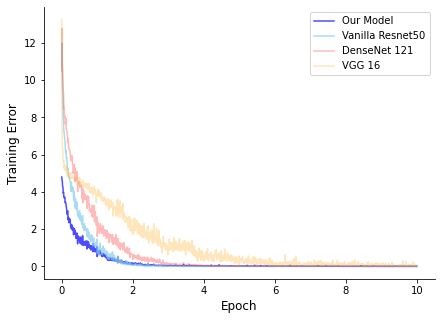

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

my_dict_vgg = dict(x = np.arange(0, 10, 10 / 1140), y = tr, z = va)

v_vgg = pd.DataFrame(my_dict_vgg)

my_dict_resnet = dict(x = np.arange(0, 10, 32 / 3.2 / 1140), y = tr_resnet50, z = va_resnet50)
v_resnet = pd.DataFrame(my_dict_resnet)

my_dict = dict(x = np.arange(0, 10, 10 / 1140), y = tr_improved, z = va_improved)
vii = pd.DataFrame(my_dict)

my_dict_dense = dict(x = np.arange(0, 10, 10 / 1140), y = tr_dense, z = va_dense)
v_dense = pd.DataFrame(my_dict_dense)

plt.figure(figsize = (7, 5))
te = sns.lineplot(x = 'x', y = 'y', data = vii, label = "Our Model", color = "blue", alpha = 0.7)
te = sns.lineplot(x = 'x', y = 'y', data = v_resnet, label = "Vanilla Resnet50", color = "skyblue", alpha = 0.7)
te = sns.lineplot(x = 'x', y = 'y', data = v_dense, label = "DenseNet 121", color = "red", alpha = 0.27)
te = sns.lineplot(x = 'x', y = 'y', data = v_vgg, label = "VGG 16", color = "orange", alpha = 0.27)

plt.xlabel("Epoch", fontsize = 12)
plt.ylabel("Training Error", fontsize = 12)

te.spines['top'].set_visible(False)
te.spines['right'].set_visible(False)

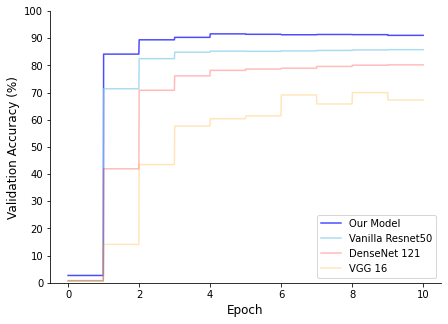

In [51]:
plt.figure(figsize = (7, 5))

vaplt = sns.lineplot(x = 'x', y = 'z', data = vii, label = "Our Model", color = "blue", alpha = 0.7) 
vaplt = sns.lineplot(x = 'x', y = 'z', data = v_resnet, label = "Vanilla Resnet50", color = "skyblue", alpha = 0.7)
vaplt = sns.lineplot(x = 'x', y = 'z', data = v_dense, label = "DenseNet 121", color = "red", alpha = 0.27)

vaplt = sns.lineplot(x = 'x', y = 'z', data = v_vgg, label = "VGG 16", color = "orange", alpha = 0.27)

plt.ylim(0, 1)
plt.yticks(np.arange(0, 1 + 0.01, 0.1), np.arange(0, 27 + 73 + 1, 10))

plt.xlabel("Epoch", fontsize = 12)
plt.ylabel("Validation Accuracy (%)", fontsize = 12)

vaplt.spines['top'].set_visible(False)
vaplt.spines['right'].set_visible(False)

Image 

Thank you! 